# Cleaning Singlehousehold Data
[Data Source](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

In [3]:
import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Change the path to the correct location of your source data
house = pd.read_csv('./household_power_consumption/household_power_consumption.txt', sep=';');
initial_rows = len(house);
initial_columns = len(house.columns);

<ipython-input-4-8c66df921854>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  house = pd.read_csv('./household_power_consumption/household_power_consumption.txt', sep=';');


In [5]:
print(initial_rows)
print(initial_columns)
house.head(10)
# Global active power (Kw) includes all the electrical energy consumption (not all of the energy consumption was captured by the submeters!!!)
# Submeters gives the energy consumption of different places from the house:
# Submeter1 : kitchen (W-h)
# Submeter2 : laundry room (W-h)
# Submeter3 : electric-water heater and airconditioning (W-h)


2075259
9


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## Some rows have empty string and a questionmark:

In [6]:
# single row where missing data has been observed
print(house.loc[[190499]])

             Date      Time Global_active_power Global_reactive_power Voltage  \
190499  28/4/2007  00:23:00                   ?                     ?       ?   

       Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
190499                ?              ?              ?             NaN  


### Detection of columns with missing values

In [7]:
# detection of columns with missing values
house_missval_by_col = (house.isnull().sum())
house.replace('?', np.NaN, inplace=True)
print('--------------- all columns with missing values ---------------')
print(house_missval_by_col)
print('--------------- only columns with missing values ---------------')
print(house_missval_by_col[house_missval_by_col > 0])
print('--------------- percentage of missing values ---------------')
print(house_missval_by_col[house_missval_by_col > 0]/initial_rows * 100)

--------------- all columns with missing values ---------------
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64
--------------- only columns with missing values ---------------
Sub_metering_3    25979
dtype: int64
--------------- percentage of missing values ---------------
Sub_metering_3    1.251844
dtype: float64


### Given that the last element is NaN, we will drop those rows using *dropna*

In [29]:
house.dropna(subset=['Sub_metering_3'], inplace=True)
effective_rows = len(house);
effective_columns = len(house.columns);
# The measurements are one minute apart and it is averaged. To convert the power consumption to energy consumption we multiply it by the factor 1/60 (to be done only when needed). The kW(Kilo Watts) units are appropiate to work with because avoids the use of decimal zeros and avoids rounding zeros. We also drop the colmuns that we are not interested in and insert new columns to be filled with synthetic data (data enrichment).
house_filtered = house.drop(columns=['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
# The columns below need to be filled up with synthetic data

# Geolocation of Sceaus city - France
house_filtered.insert(2,'Latitude', '48.783333')
house_filtered.insert(3,'Longitude', '2.283333')

house_filtered.insert(4,'House_or_apartment', 0) # 0 house, 1 apartment
house_filtered.insert(5,'Area_of_residence', 0) # to be inserted in meters squared
house_filtered.insert(6,'House_is_isolated', 0) # 0 no, 1 yes
house_filtered.insert(7,'Number_of_residents', 0) # to be an unsigned number
house_filtered.insert(8,'Heating_type', 0) # 0 electrical, 1 gas
house_filtered.insert(9,'Solar_panels', 0) # 0 don't use, 1 use
house_filtered.head(10)

,Date,Time,Latitude,Longitude,House_or_apartment,Area_of_residence,House_is_isolated,Number_of_residents,Heating_type,Solar_panels,Global_active_power
0,16/12/2006,17:24:00,48.783333,2.283333,0,0,0,0,0,0,4.216
1,16/12/2006,17:25:00,48.783333,2.283333,0,0,0,0,0,0,5.360
2,16/12/2006,17:26:00,48.783333,2.283333,0,0,0,0,0,0,5.374
3,16/12/2006,17:27:00,48.783333,2.283333,0,0,0,0,0,0,5.388
4,16/12/2006,17:28:00,48.783333,2.283333,0,0,0,0,0,0,3.666
5,16/12/2006,17:29:00,48.783333,2.283333,0,0,0,0,0,0,3.520
6,16/12/2006,17:30:00,48.783333,2.283333,0,0,0,0,0,0,3.702
7,16/12/2006,17:31:00,48.783333,2.283333,0,0,0,0,0,0,3.700
8,16/12/2006,17:32:00,48.783333,2.283333,0,0,0,0,0,0,3.668
9,16/12/2006,17:33:00,48.783333,2.283333,0,0,0,0,0,0,3.662


In [30]:
# convert all object columns to fitting type
house_filtered['Date'] = pd.to_datetime(house_filtered['Date'], format='%d/%m/%Y')
house_filtered['Time'] = pd.to_datetime(house_filtered['Time']).dt.time
house_filtered['Latitude'] = house_filtered['Latitude'].astype(float, errors = 'raise')
house_filtered['Longitude'] = house_filtered['Longitude'].astype(float, errors = 'raise')
house_filtered['Global_active_power'] = house_filtered['Global_active_power'].astype(float, errors = 'raise')
house_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   Time                 object        
 2   Latitude             float64       
 3   Longitude            float64       
 4   House_or_apartment   int64         
 5   Area_of_residence    int64         
 6   House_is_isolated    int64         
 7   Number_of_residents  int64         
 8   Heating_type         int64         
 9   Solar_panels         int64         
 10  Global_active_power  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 187.6+ MB


In [31]:
# group by day
# house_resample = house_filtered.resample('D', on='Date').mean()
# house_resample = house_resample.reset_index()
# house_resample.head()

house_filtered.head()

,Date,Time,Latitude,Longitude,House_or_apartment,Area_of_residence,House_is_isolated,Number_of_residents,Heating_type,Solar_panels,Global_active_power
0,2006-12-16,17:24:00,48.783333,2.283333,0,0,0,0,0,0,4.216
1,2006-12-16,17:25:00,48.783333,2.283333,0,0,0,0,0,0,5.360
2,2006-12-16,17:26:00,48.783333,2.283333,0,0,0,0,0,0,5.374
3,2006-12-16,17:27:00,48.783333,2.283333,0,0,0,0,0,0,5.388
4,2006-12-16,17:28:00,48.783333,2.283333,0,0,0,0,0,0,3.666


Text(0, 0.5, 'Global active power')

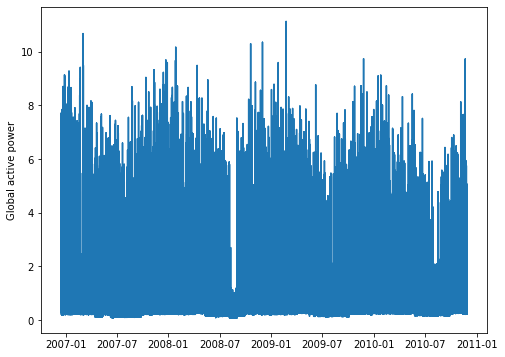

In [34]:
# visualise data per minute
_, ax = plt.subplots(figsize=(8, 6))
ax.plot(house_filtered['Date'], house_filtered['Global_active_power'])
plt.ylabel("Global active power")

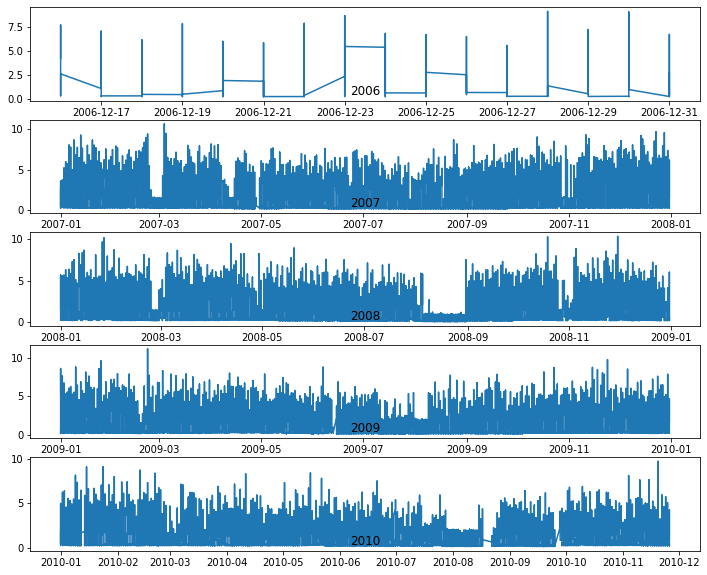

In [56]:
# visualisation per year
plt.figure(figsize=(12,10))
years = [2006, 2007, 2008, 2009, 2010]
for i in range(len(years)):
    ax = plt.subplot(len(years), 1, 1+i)
    res = house_filtered[house_filtered['Date'].dt.year == years[i]]
    plt.plot(res['Date'], res['Global_active_power'])
    plt.title(str(years[i]), y=0)
plt.show()

# almost no data available for 2006
# missing data for some periods

In [51]:
# change path to the location for the desired output
house_filtered.to_csv('./household_power_consumption/single_household_filtered.csv')